<a href="https://colab.research.google.com/github/kjedrzejczak/bank_risk_analytics/blob/main/Bank_risk_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

datasets Dowloaded from Kaggle: https://www.kaggle.com/datasets/gauravduttakiit/loan-defaulter

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = 150
pd.options.display.max_rows = 150

In [2]:
from google.colab import drive
drive.mount('/content/drive')

df_application = pd.read_csv('/content/drive/MyDrive/Bank_risk_analytics/data/application_data.csv')
df_previous = pd.read_csv('/content/drive/MyDrive/Bank_risk_analytics/data/previous_application.csv')
df_description = pd.read_csv('/content/drive/MyDrive/Bank_risk_analytics/data/columns_description.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df_description.head()

,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN


In [4]:
df_description.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   160 non-null    int64 
 1   Table        160 non-null    object
 2   Row          160 non-null    object
 3   Description  160 non-null    object
 4   Special      69 non-null     object
dtypes: int64(1), object(4)
memory usage: 6.4+ KB


In [5]:
df_application.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df_application.info(verbose=True, memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [7]:
df_application.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [8]:
df_application.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

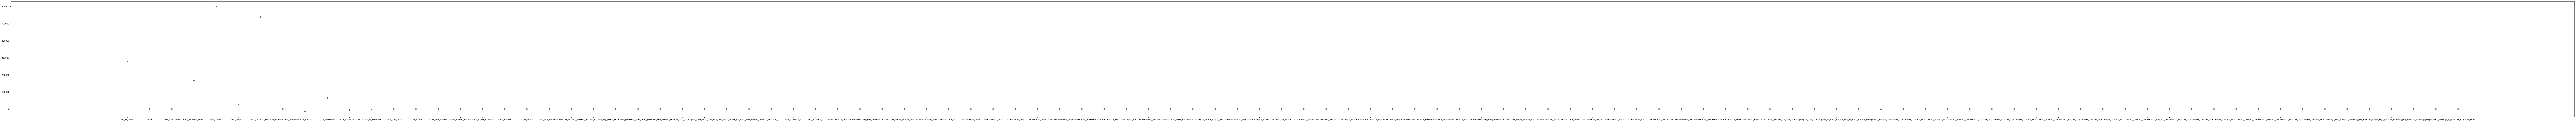

In [9]:
from matplotlib.pyplot import figure
figure(figsize=(220, 10))
plt.scatter(df_application.describe().columns, df_application.describe().loc['mean'])

In [10]:
df_application['TARGET'].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

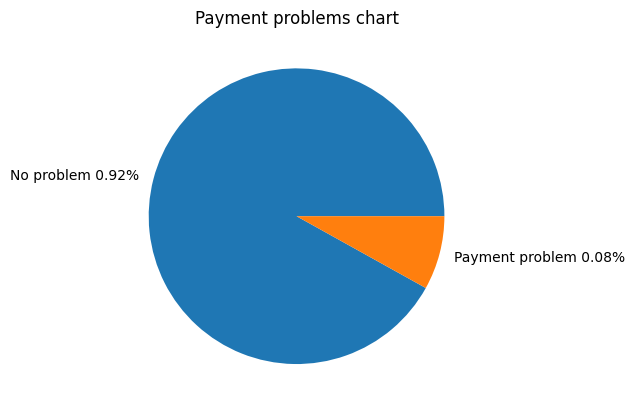

In [11]:
sizes = df_application['TARGET'].value_counts().to_list()
labels = f'No problem {sizes[0] / sum(sizes):.2f}%', f'Payment problem {sizes[1] / sum(sizes):.2f}%'
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)
plt.title('Payment problems chart')
plt.show()

# Analysis of categorical values 👈

In [12]:
df_obj = df_application.select_dtypes(include='object')

In [13]:
print(len(df_obj.columns))

16


In [14]:
df_obj.isnull().sum()

NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
OCCUPATION_TYPE                96391
WEEKDAY_APPR_PROCESS_START         0
ORGANIZATION_TYPE                  0
FONDKAPREMONT_MODE            210295
HOUSETYPE_MODE                154297
WALLSMATERIAL_MODE            156341
EMERGENCYSTATE_MODE           145755
dtype: int64

In [15]:
df_obj.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,NaN,NaN,NaN,NaN
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,NaN,NaN,NaN,NaN
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,NaN,NaN,NaN,NaN


In [16]:
for i in df_obj.columns:
  print(i, df_obj[i].value_counts().index.to_list(), sep='-----------👈')

NAME_CONTRACT_TYPE-----------👈['Cash loans', 'Revolving loans']
CODE_GENDER-----------👈['F', 'M', 'XNA']
FLAG_OWN_CAR-----------👈['N', 'Y']
FLAG_OWN_REALTY-----------👈['Y', 'N']
NAME_TYPE_SUITE-----------👈['Unaccompanied', 'Family', 'Spouse, partner', 'Children', 'Other_B', 'Other_A', 'Group of people']
NAME_INCOME_TYPE-----------👈['Working', 'Commercial associate', 'Pensioner', 'State servant', 'Unemployed', 'Student', 'Businessman', 'Maternity leave']
NAME_EDUCATION_TYPE-----------👈['Secondary / secondary special', 'Higher education', 'Incomplete higher', 'Lower secondary', 'Academic degree']
NAME_FAMILY_STATUS-----------👈['Married', 'Single / not married', 'Civil marriage', 'Separated', 'Widow', 'Unknown']
NAME_HOUSING_TYPE-----------👈['House / apartment', 'With parents', 'Municipal apartment', 'Rented apartment', 'Office apartment', 'Co-op apartment']
OCCUPATION_TYPE-----------👈['Laborers', 'Sales staff', 'Core staff', 'Managers', 'Drivers', 'High skill tech staff', 'Accountants', 

# % of organization type that have problems with payment

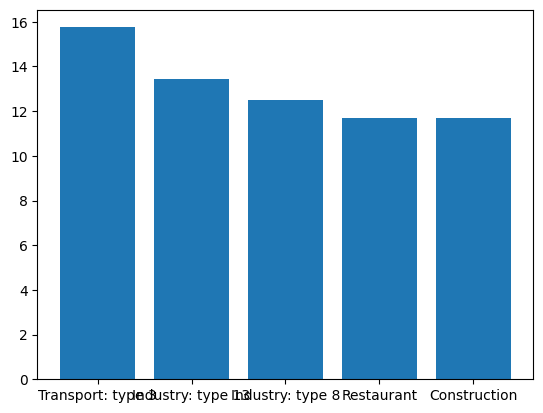

In [17]:
df = df_application

df_org_type = df.groupby('ORGANIZATION_TYPE')['TARGET'].sum()  / df_obj['ORGANIZATION_TYPE'].value_counts() * 100
df_org_type.sort_values(ascending=False)

plt.bar(df_org_type.sort_values(ascending=False).index[:5], df_org_type.sort_values(ascending=False)[:5])
plt.show()

# All categorical types - limit to 10 greatest values 👈 % of organization type that have problems with payment

NAME_CONTRACT_TYPE-----------👈['Cash loans', 'Revolving loans']


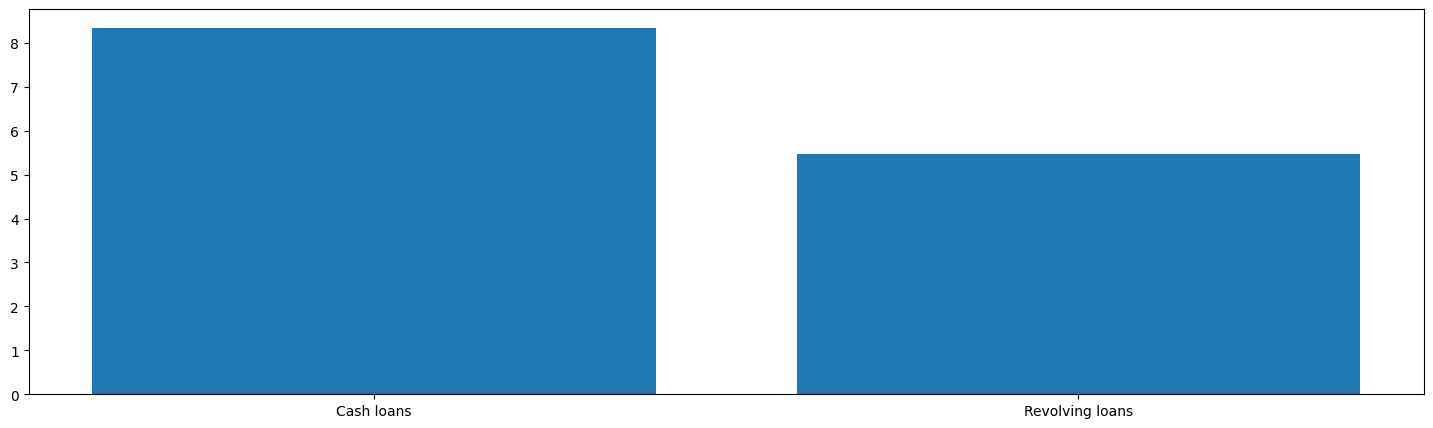






CODE_GENDER-----------👈['F', 'M', 'XNA']


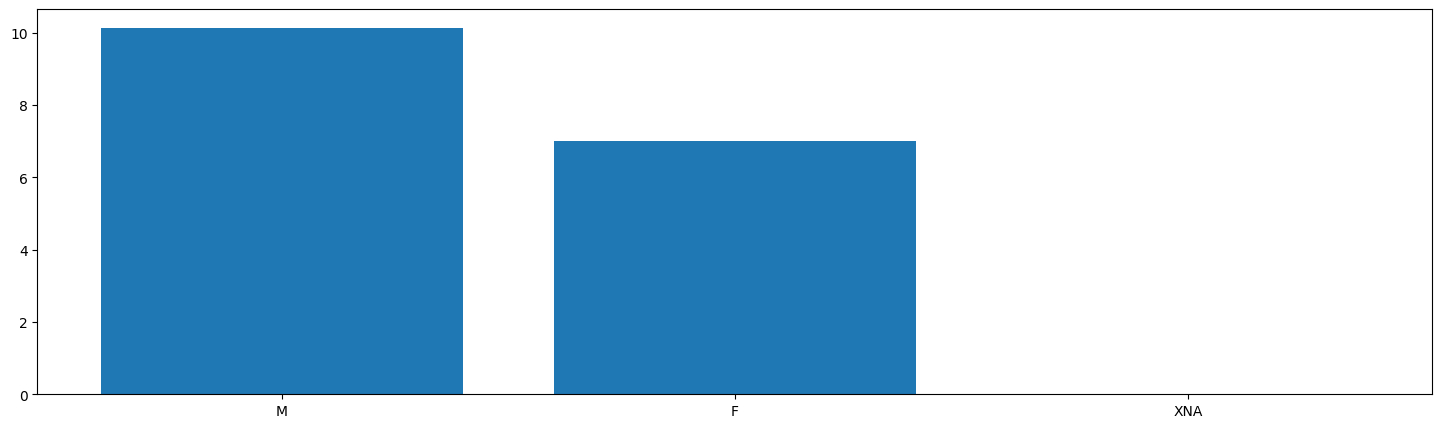






FLAG_OWN_CAR-----------👈['N', 'Y']


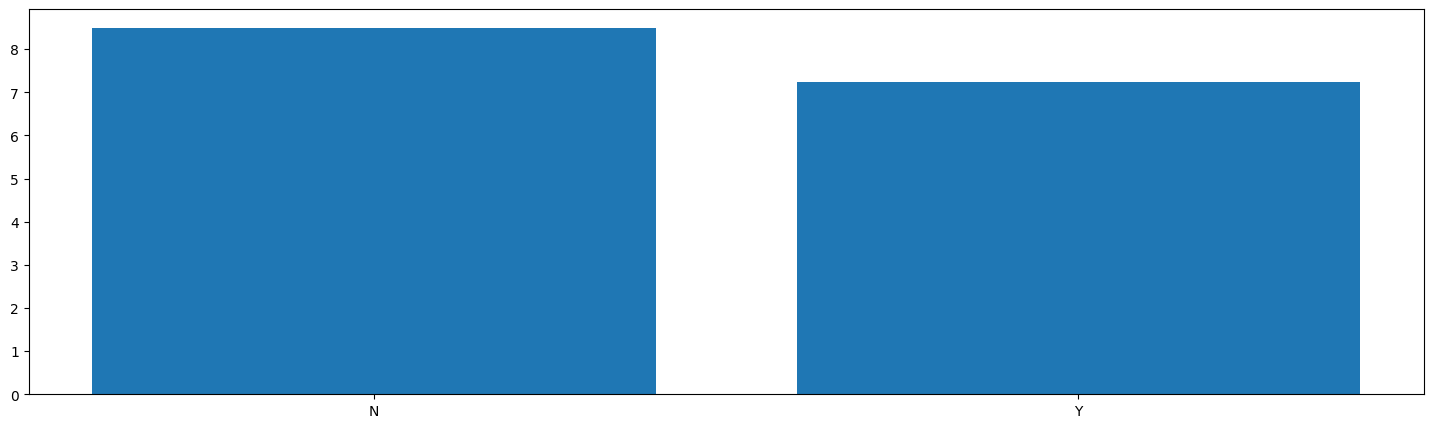






FLAG_OWN_REALTY-----------👈['Y', 'N']


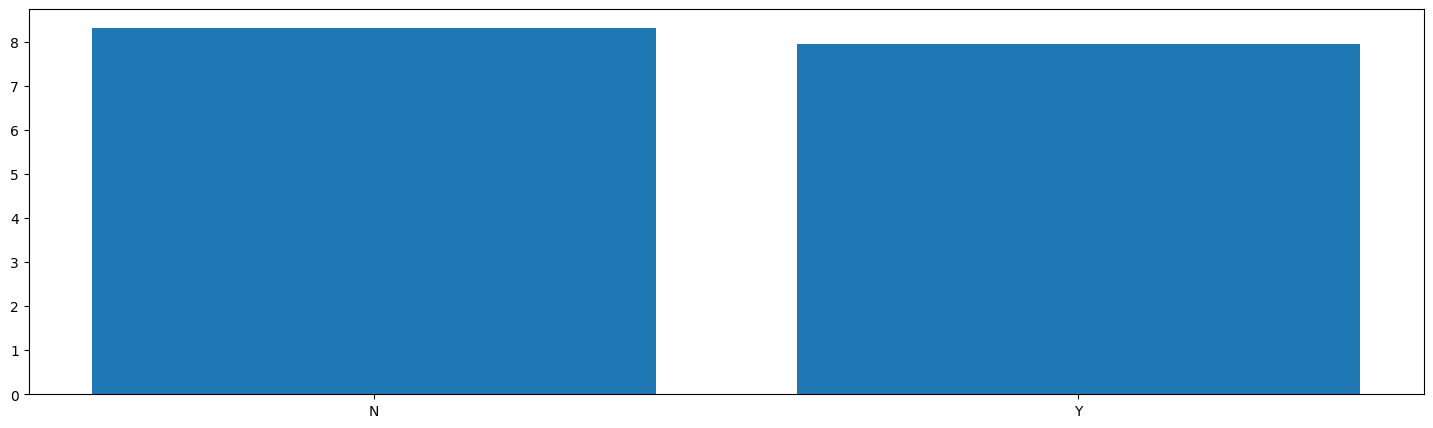






NAME_TYPE_SUITE-----------👈['Unaccompanied', 'Family', 'Spouse, partner', 'Children', 'Other_B', 'Other_A', 'Group of people']


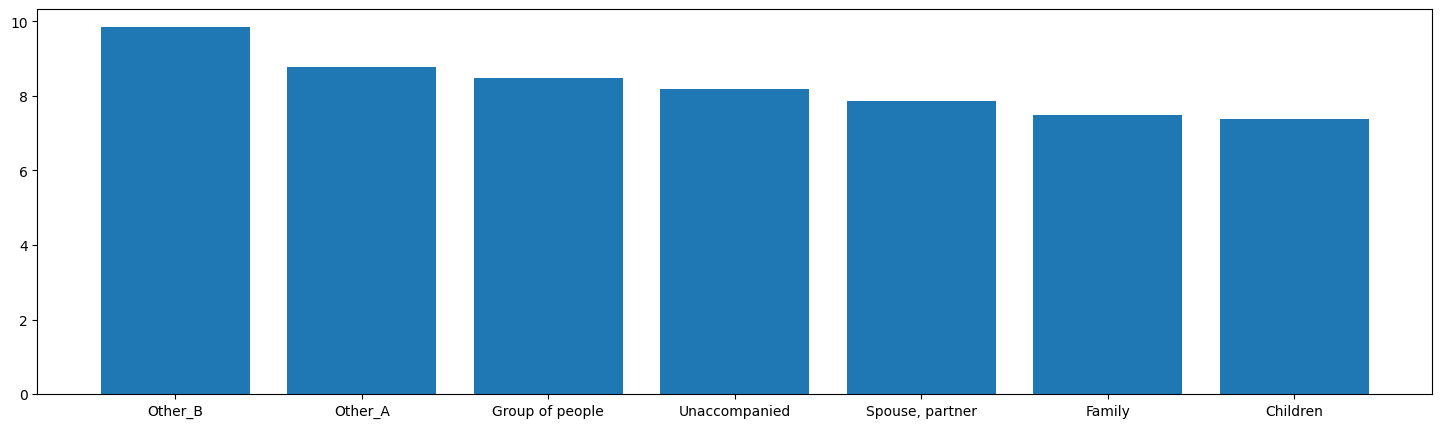






NAME_INCOME_TYPE-----------👈['Working', 'Commercial associate', 'Pensioner', 'State servant', 'Unemployed', 'Student', 'Businessman', 'Maternity leave']


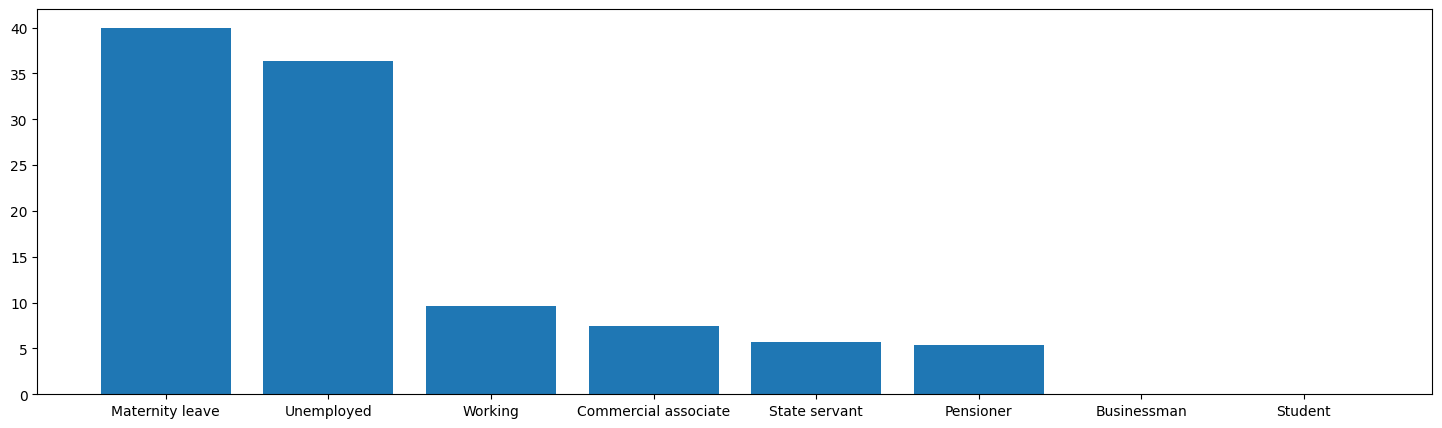






NAME_EDUCATION_TYPE-----------👈['Secondary / secondary special', 'Higher education', 'Incomplete higher', 'Lower secondary', 'Academic degree']


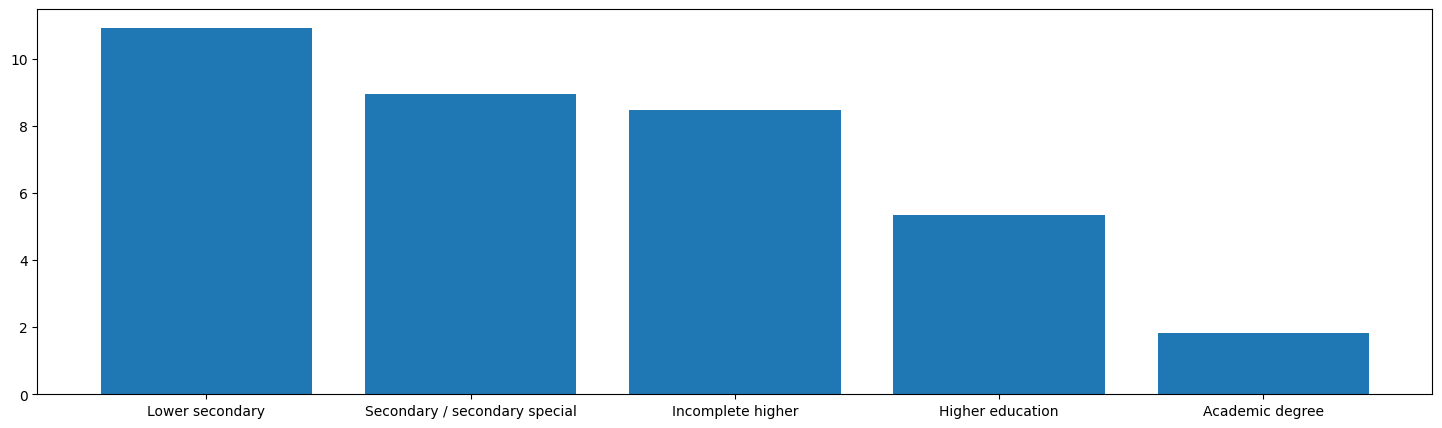






NAME_FAMILY_STATUS-----------👈['Married', 'Single / not married', 'Civil marriage', 'Separated', 'Widow', 'Unknown']


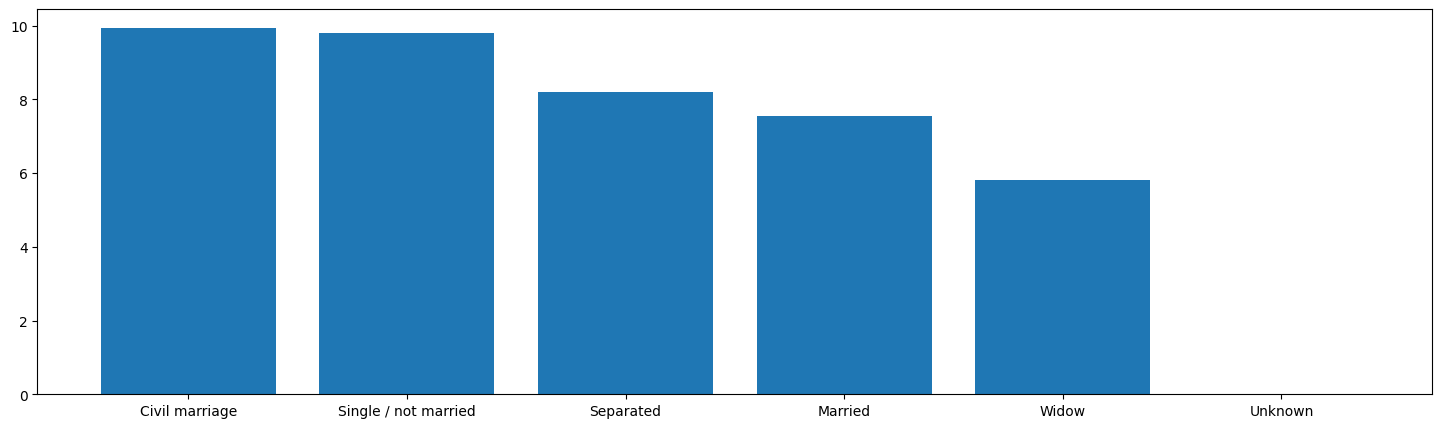






NAME_HOUSING_TYPE-----------👈['House / apartment', 'With parents', 'Municipal apartment', 'Rented apartment', 'Office apartment', 'Co-op apartment']


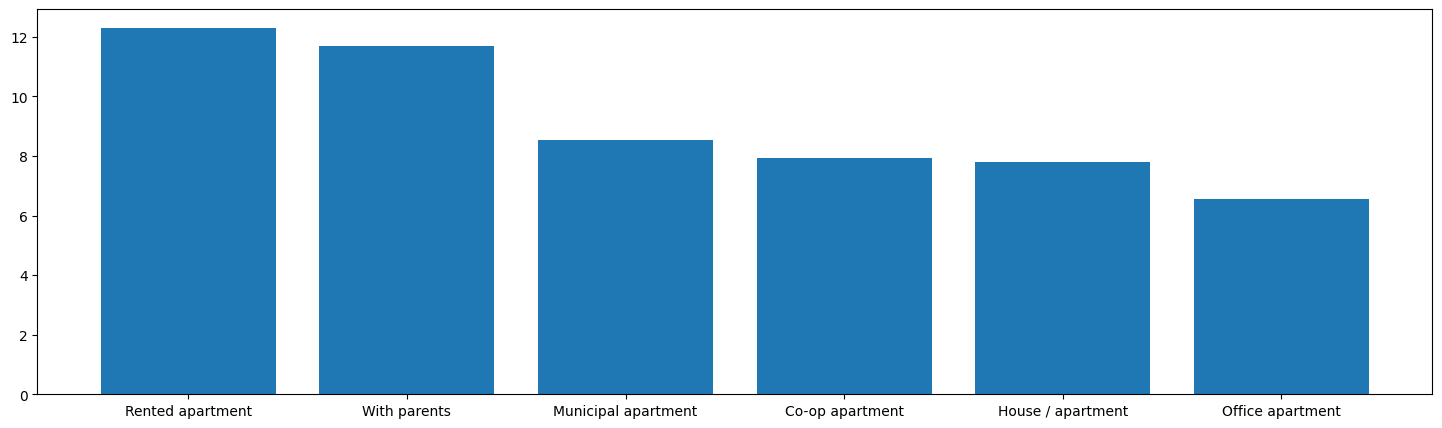






OCCUPATION_TYPE-----------👈['Laborers', 'Sales staff', 'Core staff', 'Managers', 'Drivers', 'High skill tech staff', 'Accountants', 'Medicine staff', 'Security staff', 'Cooking staff', 'Cleaning staff', 'Private service staff', 'Low-skill Laborers', 'Waiters/barmen staff', 'Secretaries', 'Realty agents', 'HR staff', 'IT staff']


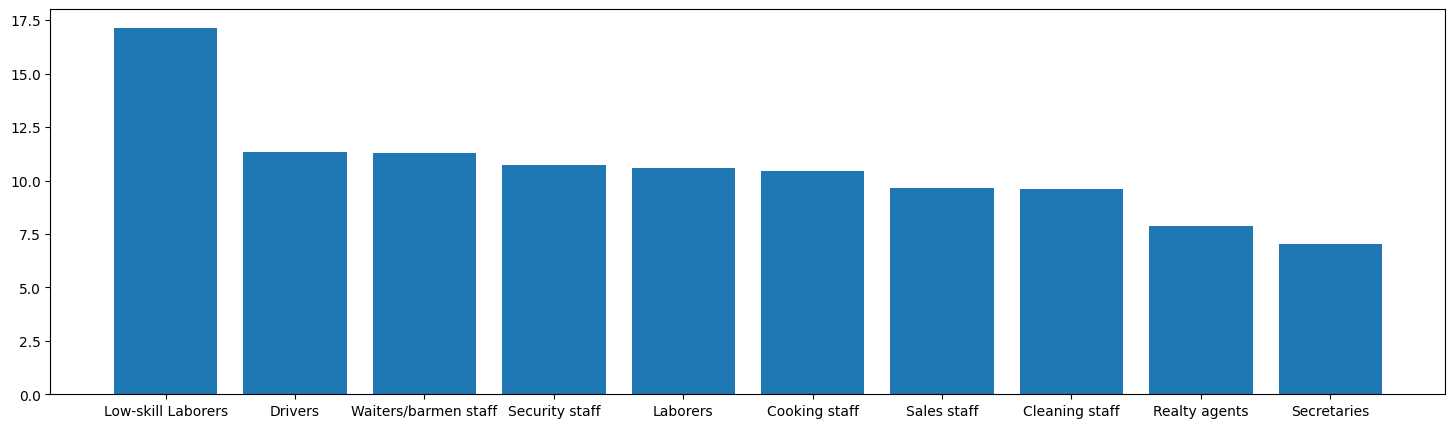






WEEKDAY_APPR_PROCESS_START-----------👈['TUESDAY', 'WEDNESDAY', 'MONDAY', 'THURSDAY', 'FRIDAY', 'SATURDAY', 'SUNDAY']


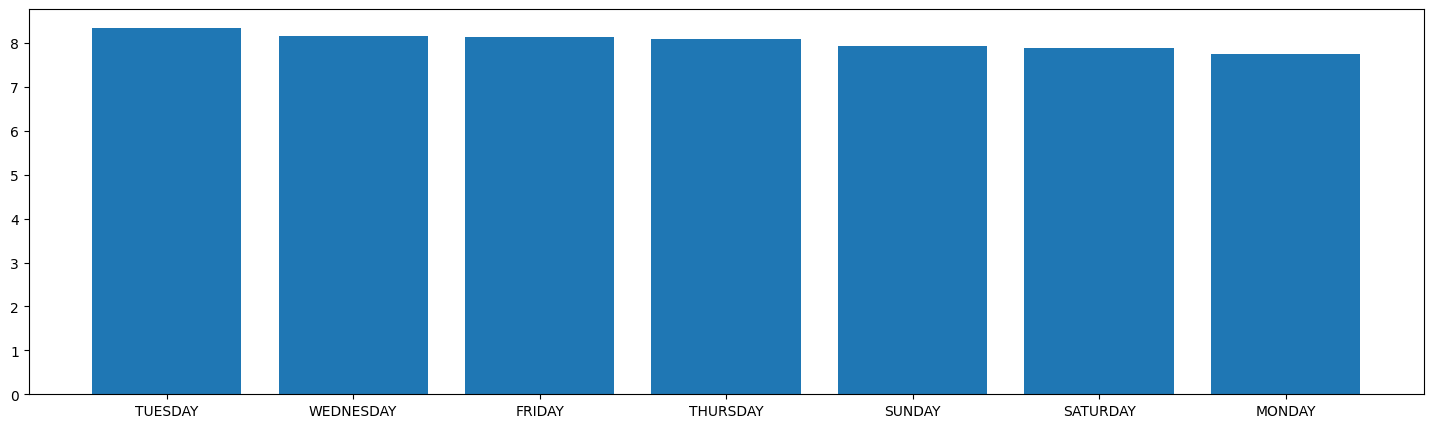






ORGANIZATION_TYPE-----------👈['Business Entity Type 3', 'XNA', 'Self-employed', 'Other', 'Medicine', 'Business Entity Type 2', 'Government', 'School', 'Trade: type 7', 'Kindergarten', 'Construction', 'Business Entity Type 1', 'Transport: type 4', 'Trade: type 3', 'Industry: type 9', 'Industry: type 3', 'Security', 'Housing', 'Industry: type 11', 'Military', 'Bank', 'Agriculture', 'Police', 'Transport: type 2', 'Postal', 'Security Ministries', 'Trade: type 2', 'Restaurant', 'Services', 'University', 'Industry: type 7', 'Transport: type 3', 'Industry: type 1', 'Hotel', 'Electricity', 'Industry: type 4', 'Trade: type 6', 'Industry: type 5', 'Insurance', 'Telecom', 'Emergency', 'Industry: type 2', 'Advertising', 'Realtor', 'Culture', 'Industry: type 12', 'Trade: type 1', 'Mobile', 'Legal Services', 'Cleaning', 'Transport: type 1', 'Industry: type 6', 'Industry: type 10', 'Religion', 'Industry: type 13', 'Trade: type 4', 'Trade: type 5', 'Industry: type 8']


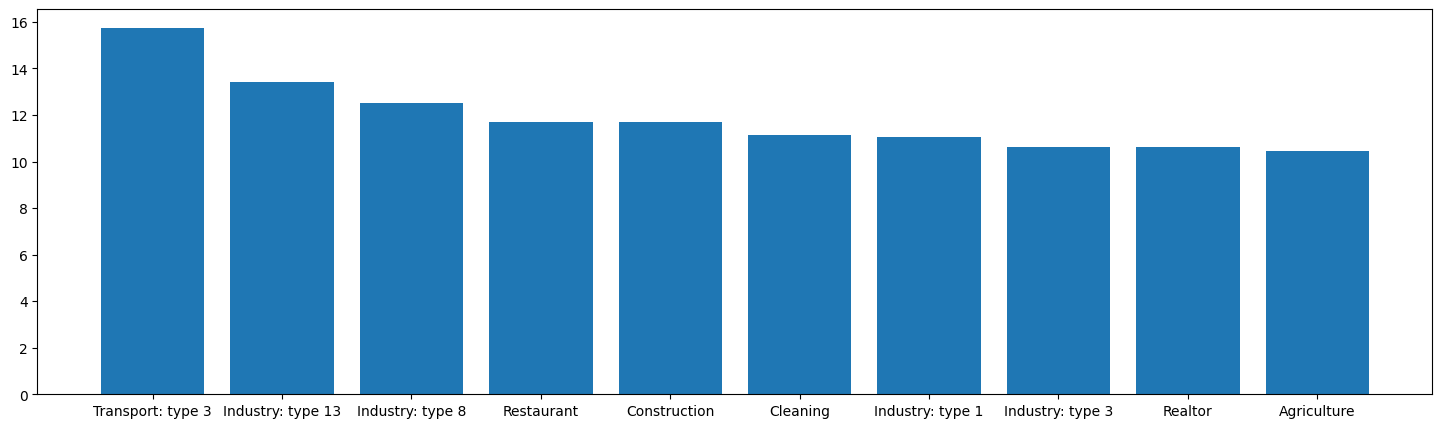






FONDKAPREMONT_MODE-----------👈['reg oper account', 'reg oper spec account', 'not specified', 'org spec account']


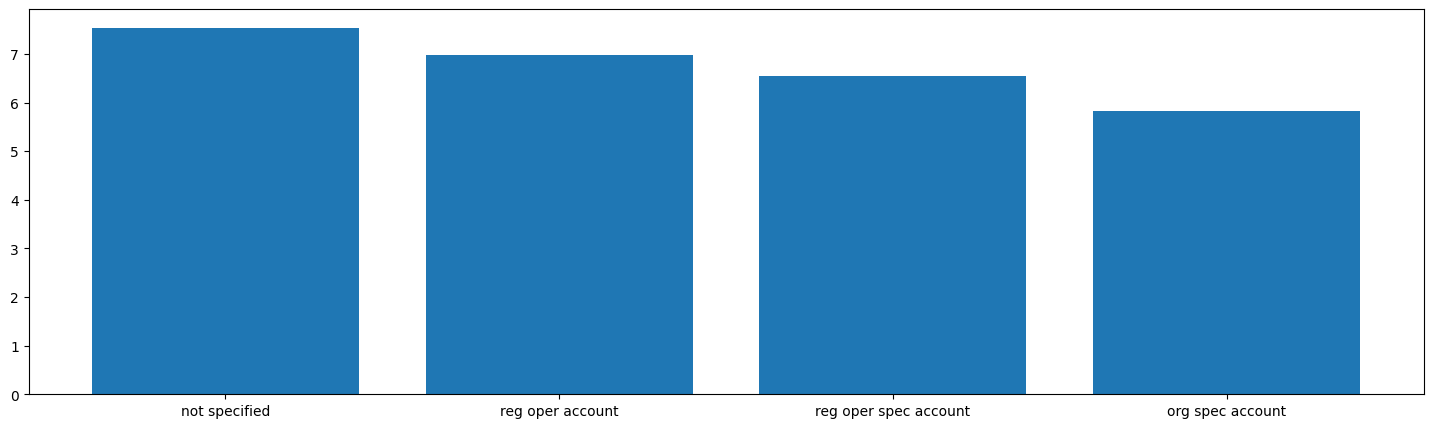






HOUSETYPE_MODE-----------👈['block of flats', 'specific housing', 'terraced house']


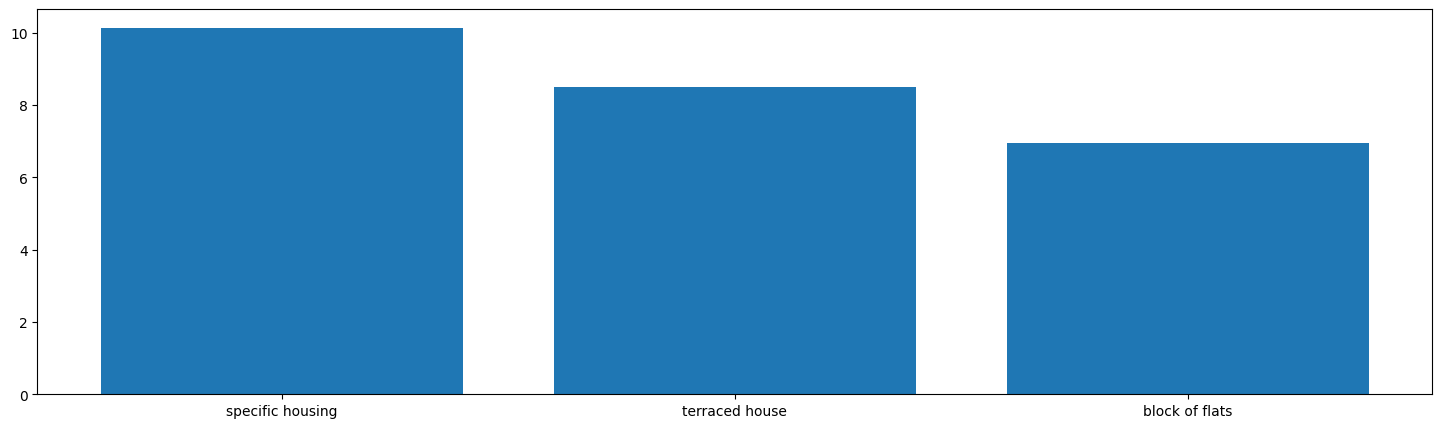






WALLSMATERIAL_MODE-----------👈['Panel', 'Stone, brick', 'Block', 'Wooden', 'Mixed', 'Monolithic', 'Others']


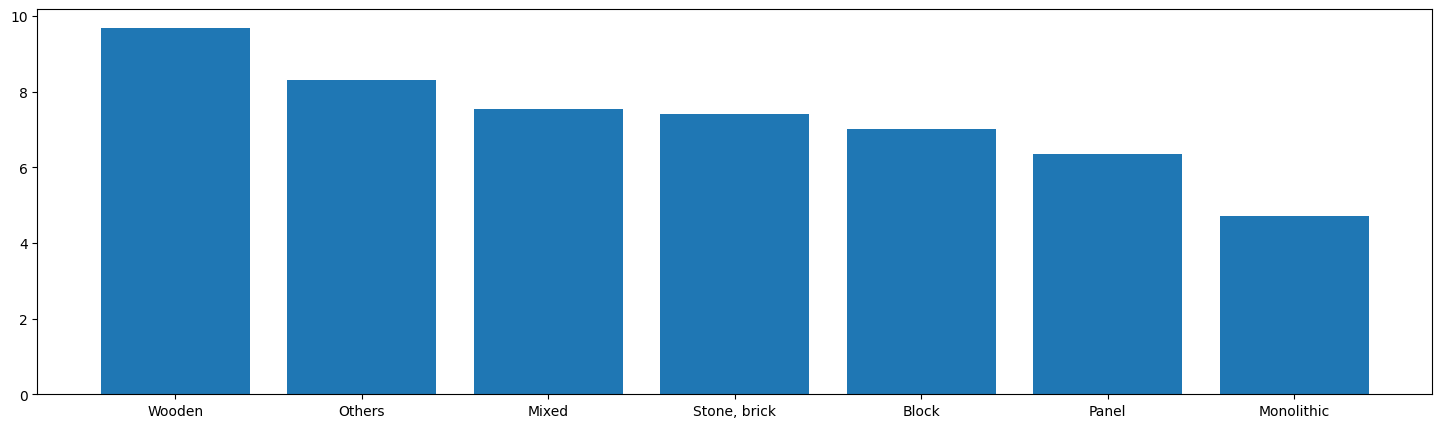






EMERGENCYSTATE_MODE-----------👈['No', 'Yes']


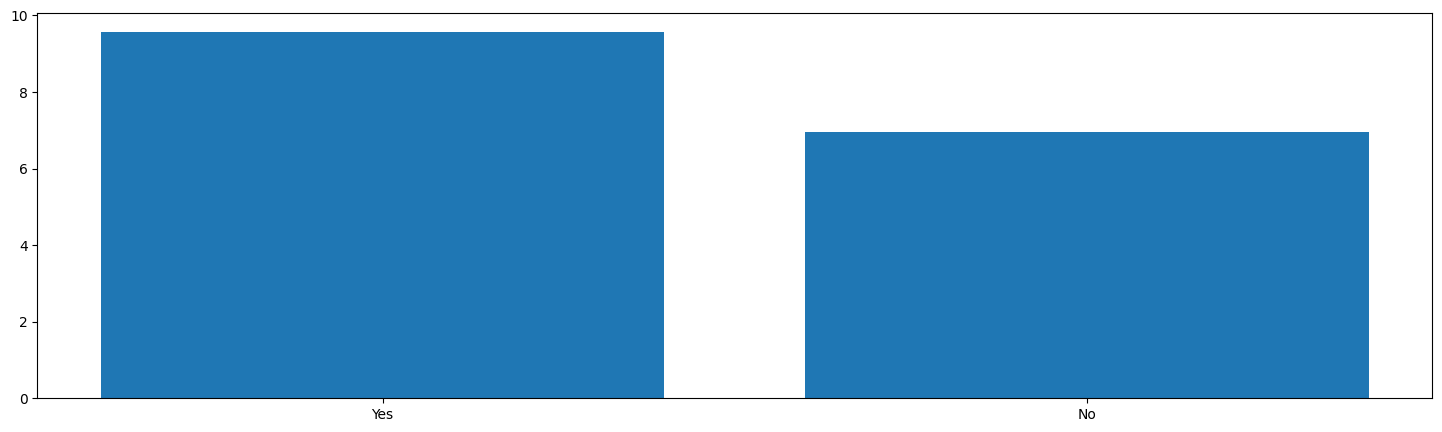

In [18]:
for i in df_obj.columns:
  figure(figsize=(18, 5))
  print(i, df_obj[i].value_counts().index.to_list(), sep='-----------👈')

  df_org_type = df.groupby(f'{i}')['TARGET'].sum()  / (df_obj[f'{i}'].value_counts()) * 100
  df_org_type.sort_values(ascending=False)
  plt.bar(df_org_type.sort_values(ascending=False).index[:10], df_org_type.sort_values(ascending=False)[:10])
  plt.show()
  print("\n\n\n\n")

# Analysis of numerical values 👈

In [19]:
df_num = df_application.select_dtypes(include='number')
df_num.head(0)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR


In [20]:
print(len(df_num.columns))

106


In [21]:
pos = df_num.corr()['TARGET'].sort_values(ascending=False)[:20]
pos

TARGET                         1.000000
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
DAYS_REGISTRATION              0.041975
OWN_CAR_AGE                    0.037612
LIVE_CITY_NOT_WORK_CITY        0.032518
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
FLAG_WORK_PHONE                0.028524
AMT_REQ_CREDIT_BUREAU_YEAR     0.019930
CNT_CHILDREN                   0.019187
CNT_FAM_MEMBERS                0.009308
OBS_30_CNT_SOCIAL_CIRCLE       0.009131
Name: TARGET, dtype: float64

In [22]:
neg = df_num.corr()['TARGET'].sort_values(ascending=True)[:25]
neg

EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS_AVG                -0.034199
ELEVATORS_MEDI               -0.033863
FLOORSMIN_AVG                -0.033614
FLOORSMIN_MEDI               -0.033394
LIVINGAREA_AVG               -0.032997
LIVINGAREA_MEDI              -0.032739
FLOORSMIN_MODE               -0.032698
TOTALAREA_MODE               -0.032596
ELEVATORS_MODE               -0.032131
LIVINGAREA_MODE              -0.030685
AMT_CREDIT                   -0.030369
APARTMENTS_AVG               -0.029498
APARTMENTS_MEDI              -0.029184
FLAG_DOCUMENT_6              -0.028602
APARTMENTS_MODE              -0.027284
LIVINGAPARTMENTS_AVG         -0.025031
Name: TARGET, dtype: floa

<Axes: >

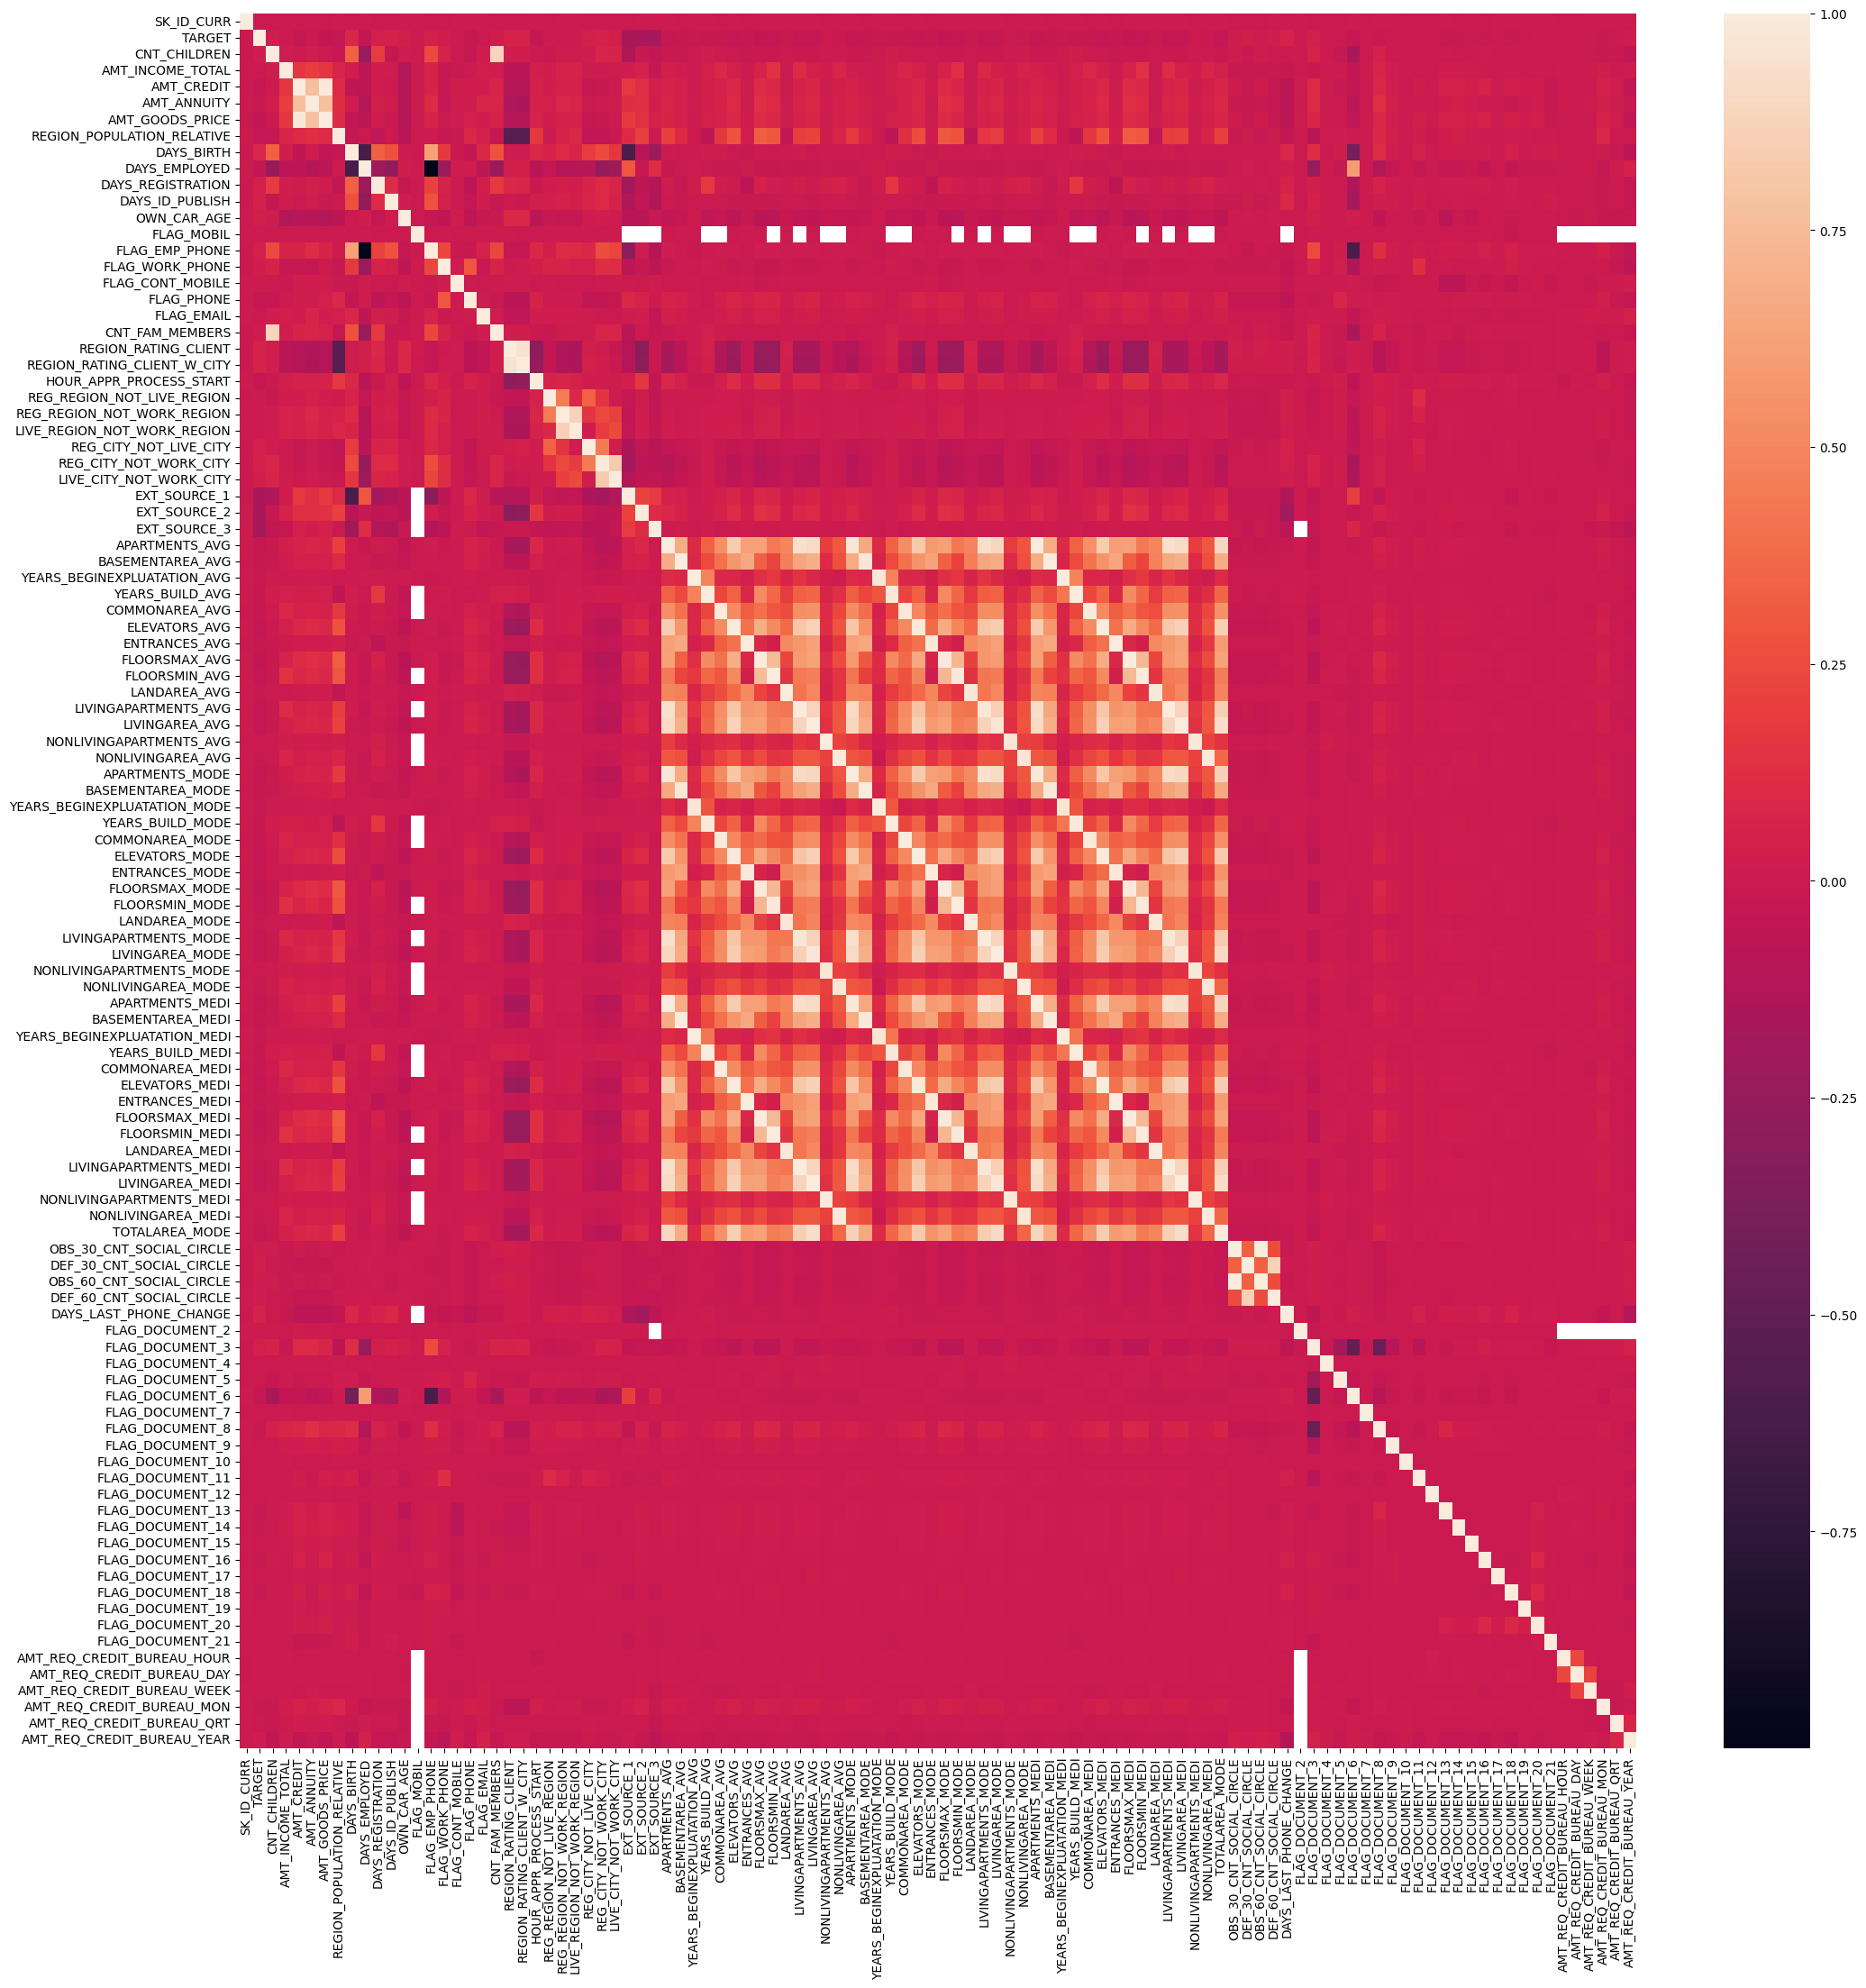

In [23]:
figure(figsize=(25, 25))
sns.heatmap(df_num.corr())

# Model data preparation

In [24]:
df_ML = df_application[list(pos.index) + list(neg.index) + list(df_obj.columns)]
df_ML

,TARGET,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,REG_CITY_NOT_WORK_CITY,FLAG_EMP_PHONE,REG_CITY_NOT_LIVE_CITY,FLAG_DOCUMENT_3,DAYS_REGISTRATION,OWN_CAR_AGE,LIVE_CITY_NOT_WORK_CITY,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_WORK_PHONE,AMT_REQ_CREDIT_BUREAU_YEAR,CNT_CHILDREN,CNT_FAM_MEMBERS,OBS_30_CNT_SOCIAL_CIRCLE,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,DAYS_EMPLOYED,FLOORSMAX_AVG,FLOORSMAX_MEDI,FLOORSMAX_MODE,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,ELEVATORS_AVG,ELEVATORS_MEDI,FLOORSMIN_AVG,FLOORSMIN_MEDI,LIVINGAREA_AVG,LIVINGAREA_MEDI,FLOORSMIN_MODE,TOTALAREA_MODE,ELEVATORS_MODE,LIVINGAREA_MODE,AMT_CREDIT,APARTMENTS_AVG,APARTMENTS_MEDI,FLAG_DOCUMENT_6,APARTMENTS_MODE,LIVINGAPARTMENTS_AVG,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,1,-9461,2,2,-1134.0,-2120,0,1,0,1,-3648.0,NaN,0,2.0,2.0,0,1.0,0,1.0,2.0,0.139376,0.262949,0.083037,-637,0.0833,0.0833,0.0833,351000.0,0.018801,0.00,0.00,0.1250,0.1250,0.0190,0.0193,0.1250,0.0149,0.0000,0.0198,406597.5,0.0247,0.0250,0,0.0252,0.0202,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
1,0,-16765,1,1,-828.0,-291,0,1,0,1,-1186.0,NaN,0,0.0,0.0,0,0.0,0,2.0,1.0,NaN,0.622246,0.311267,-1188,0.2917,0.2917,0.2917,1129500.0,0.003541,0.08,0.08,0.3333,0.3333,0.0549,0.0558,0.3333,0.0714,0.0806,0.0554,1293502.5,0.0959,0.0968,0,0.0924,0.0773,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No
2,0,-19046,2,2,-815.0,-2531,0,1,0,0,-4260.0,26.0,0,0.0,0.0,1,0.0,0,1.0,0.0,0.729567,0.555912,NaN,-225,NaN,NaN,NaN,135000.0,0.010032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,135000.0,NaN,NaN,0,NaN,NaN,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,NaN,NaN,NaN,NaN
3,0,-19005,2,2,-617.0,-2437,0,1,0,1,-9833.0,NaN,0,0.0,0.0,0,NaN,0,2.0,2.0,NaN,0.650442,NaN,-3039,NaN,NaN,NaN,297000.0,0.008019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,312682.5,NaN,NaN,0,NaN,NaN,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,NaN,NaN,NaN,NaN
4,0,-19932,2,2,-1106.0,-3458,1,1,0,0,-4311.0,NaN,1,0.0,0.0,0,0.0,0,1.0,0.0,NaN,0.322738,NaN,-3038,NaN,NaN,NaN,513000.0,0.028663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,513000.0,NaN,NaN,0,NaN,NaN,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,-9327,1,1,-273.0,-1982,0,1,0,0,-8456.0,NaN,0,0.0,0.0,0,NaN,0,1.0,0.0,NaN,0.681632,0.145570,-236,0.6042,0.6042,0.4583,225000.0,0.032561,0.22,0.22,0.2708,0.2708,0.1965,0.2001,0.0417,0.2898,0.0806,0.0853,254700.0,0.2021,0.2040,0,0.1008,0.1484,Cash loans,M,N,N,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,Sales staff,THURSDAY,Services,reg oper account,block of flats,"Stone, brick",No
307507,0,-20775,2,2,0.0,-4090,0,0,0,1,-4388.0,NaN,0,0.0,0.0,0,NaN,0,1.0,0.0,NaN,0.115992,NaN,365243,0.0833,0.0833,0.0833,225000.0,0.025164,0.00,0.00,0.1250,0.1250,0.0257,0.0261,0.1250,0.0214,0.0000,0.0267,269550.0,0.0247,0.0250,0,0.0252,0.0202,Cash loans,F,N,Y,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,NaN,MONDAY,XNA,reg oper account,block

In [25]:
df_ML.isnull().sum()

TARGET                              0
DAYS_BIRTH                          0
REGION_RATING_CLIENT_W_CITY         0
REGION_RATING_CLIENT                0
DAYS_LAST_PHONE_CHANGE              1
DAYS_ID_PUBLISH                     0
REG_CITY_NOT_WORK_CITY              0
FLAG_EMP_PHONE                      0
REG_CITY_NOT_LIVE_CITY              0
FLAG_DOCUMENT_3                     0
DAYS_REGISTRATION                   0
OWN_CAR_AGE                    202929
LIVE_CITY_NOT_WORK_CITY             0
DEF_30_CNT_SOCIAL_CIRCLE         1021
DEF_60_CNT_SOCIAL_CIRCLE         1021
FLAG_WORK_PHONE                     0
AMT_REQ_CREDIT_BUREAU_YEAR      41519
CNT_CHILDREN                        0
CNT_FAM_MEMBERS                     2
OBS_30_CNT_SOCIAL_CIRCLE         1021
EXT_SOURCE_3                    60965
EXT_SOURCE_2                      660
EXT_SOURCE_1                   173378
DAYS_EMPLOYED                       0
FLOORSMAX_AVG                  153020
FLOORSMAX_MEDI                 153020
FLOORSMAX_MO

In [26]:
df_ML = df_ML.dropna()
df_ML.isnull().sum()

TARGET                         0
DAYS_BIRTH                     0
REGION_RATING_CLIENT_W_CITY    0
REGION_RATING_CLIENT           0
DAYS_LAST_PHONE_CHANGE         0
DAYS_ID_PUBLISH                0
REG_CITY_NOT_WORK_CITY         0
FLAG_EMP_PHONE                 0
REG_CITY_NOT_LIVE_CITY         0
FLAG_DOCUMENT_3                0
DAYS_REGISTRATION              0
OWN_CAR_AGE                    0
LIVE_CITY_NOT_WORK_CITY        0
DEF_30_CNT_SOCIAL_CIRCLE       0
DEF_60_CNT_SOCIAL_CIRCLE       0
FLAG_WORK_PHONE                0
AMT_REQ_CREDIT_BUREAU_YEAR     0
CNT_CHILDREN                   0
CNT_FAM_MEMBERS                0
OBS_30_CNT_SOCIAL_CIRCLE       0
EXT_SOURCE_3                   0
EXT_SOURCE_2                   0
EXT_SOURCE_1                   0
DAYS_EMPLOYED                  0
FLOORSMAX_AVG                  0
FLOORSMAX_MEDI                 0
FLOORSMAX_MODE                 0
AMT_GOODS_PRICE                0
REGION_POPULATION_RELATIVE     0
ELEVATORS_AVG                  0
ELEVATORS_

In [27]:
print(len(df_ML.columns))

61


In [28]:
df_ML_dumm = pd.get_dummies(df_ML)
df_ML_dumm.head(1)

,TARGET,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,REG_CITY_NOT_WORK_CITY,FLAG_EMP_PHONE,REG_CITY_NOT_LIVE_CITY,FLAG_DOCUMENT_3,DAYS_REGISTRATION,OWN_CAR_AGE,LIVE_CITY_NOT_WORK_CITY,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_WORK_PHONE,AMT_REQ_CREDIT_BUREAU_YEAR,CNT_CHILDREN,CNT_FAM_MEMBERS,OBS_30_CNT_SOCIAL_CIRCLE,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,DAYS_EMPLOYED,FLOORSMAX_AVG,FLOORSMAX_MEDI,FLOORSMAX_MODE,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,ELEVATORS_AVG,ELEVATORS_MEDI,FLOORSMIN_AVG,FLOORSMIN_MEDI,LIVINGAREA_AVG,LIVINGAREA_MEDI,FLOORSMIN_MODE,TOTALAREA_MODE,ELEVATORS_MODE,LIVINGAREA_MODE,AMT_CREDIT,APARTMENTS_AVG,APARTMENTS_MEDI,FLAG_DOCUMENT_6,APARTMENTS_MODE,LIVINGAPARTMENTS_AVG,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,...,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,FONDKAPREMONT_MODE_not specified,FONDKAPREMONT_MODE_org spec account,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_reg oper spec account,HOUSETYPE_MODE_block of flats,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
7

In [29]:
df_ML_dumm = df_ML_dumm.astype('float')
df_ML_dumm

,TARGET,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,REG_CITY_NOT_WORK_CITY,FLAG_EMP_PHONE,REG_CITY_NOT_LIVE_CITY,FLAG_DOCUMENT_3,DAYS_REGISTRATION,OWN_CAR_AGE,LIVE_CITY_NOT_WORK_CITY,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_WORK_PHONE,AMT_REQ_CREDIT_BUREAU_YEAR,CNT_CHILDREN,CNT_FAM_MEMBERS,OBS_30_CNT_SOCIAL_CIRCLE,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,DAYS_EMPLOYED,FLOORSMAX_AVG,FLOORSMAX_MEDI,FLOORSMAX_MODE,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,ELEVATORS_AVG,ELEVATORS_MEDI,FLOORSMIN_AVG,FLOORSMIN_MEDI,LIVINGAREA_AVG,LIVINGAREA_MEDI,FLOORSMIN_MODE,TOTALAREA_MODE,ELEVATORS_MODE,LIVINGAREA_MODE,AMT_CREDIT,APARTMENTS_AVG,APARTMENTS_MEDI,FLAG_DOCUMENT_6,APARTMENTS_MODE,LIVINGAPARTMENTS_AVG,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,...,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,FONDKAPREMONT_MODE_not specified,FONDKAPREMONT_MODE_org spec account,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_reg oper spec account,HOUSETYPE_MODE_block of flats,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
7

# ML MODEL ✨

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [31]:
data = df_ML_dumm
target = data.pop('TARGET')

In [32]:
scaler = StandardScaler()
data = scaler.fit_transform(data)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(data, target, stratify=target, random_state=10)

In [34]:
for model in [LogisticRegression, SVC, GaussianNB, BernoulliNB, KNeighborsClassifier, DecisionTreeClassifier, XGBClassifier]:
  if model == LogisticRegression:
    max_iter = 1000
    for x, y in [(42, True), (None, False)]:
      cls = model(max_iter=max_iter)
      kfold = model_selection.KFold(n_splits=15, random_state=x, shuffle=y)
      res = model_selection.cross_val_score(cls, X_train, y_train, scoring="roc_auc", cv=kfold)
      print(f"{model.__name__}")
      print(f"AUC: {res.mean():.4f}")
      print(f"STD: {res.std():.4f}")
      print(x, y)
      print()
  else:
    for x, y in [(42, True), (None, False)]:
      cls = model()
      kfold = model_selection.KFold(n_splits=15, random_state=x, shuffle=y)
      res = model_selection.cross_val_score(cls, X_train, y_train, scoring="roc_auc", cv=kfold)
      print(f"{model.__name__}")
      print(f"AUC: {res.mean():.4f}")
      print(f"STD: {res.std():.4f}")
      print(x, y)
      print()

LogisticRegression
AUC: 0.7142
STD: 0.0449
42 True

LogisticRegression
AUC: 0.7149
STD: 0.0493
None False

SVC
AUC: 0.6244
STD: 0.0453
42 True

SVC
AUC: 0.6210
STD: 0.0626
None False

GaussianNB
AUC: 0.5082
STD: 0.0218
42 True

GaussianNB
AUC: 0.5100
STD: 0.0167
None False

BernoulliNB
AUC: 0.6634
STD: 0.0438
42 True

BernoulliNB
AUC: 0.6643
STD: 0.0488
None False

KNeighborsClassifier
AUC: 0.5150
STD: 0.0368
42 True

KNeighborsClassifier
AUC: 0.5212
STD: 0.0513
None False

DecisionTreeClassifier
AUC: 0.5300
STD: 0.0364
42 True

DecisionTreeClassifier
AUC: 0.5275
STD: 0.0247
None False

XGBClassifier
AUC: 0.6827
STD: 0.0432
42 True

XGBClassifier
AUC: 0.6897
STD: 0.0521
None False



# Candidates XGBoost and LogisticRegression

In [35]:
for model in [LogisticRegression]:
  for j in ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky']:
    print(j)
    max_iter = 1000
    for x, y in [(42, True), (None, False)]:
      cls = model(max_iter=max_iter, solver=j, fit_intercept=False)
      kfold = model_selection.KFold(n_splits=15, random_state=x, shuffle=y)
      res = model_selection.cross_val_score(cls, X_train, y_train, scoring="roc_auc", cv=kfold)
      print(f"{model.__name__}")
      print(f"AUC: {res.mean():.4f}")
      print(f"STD: {res.std():.4f}")
      print(x, y)
      print()



lbfgs
LogisticRegression
AUC: 0.7132
STD: 0.0420
42 True

LogisticRegression
AUC: 0.7036
STD: 0.0565
None False

liblinear
LogisticRegression
AUC: 0.7132
STD: 0.0420
42 True

LogisticRegression
AUC: 0.7036
STD: 0.0565
None False

newton-cg
LogisticRegression
AUC: 0.7132
STD: 0.0420
42 True

LogisticRegression
AUC: 0.7036
STD: 0.0565
None False

newton-cholesky
LogisticRegression
AUC: 0.7132
STD: 0.0420
42 True

LogisticRegression
AUC: 0.7036
STD: 0.0565
None False



In [36]:
for model in [XGBClassifier]:
  for j in ['gbtree', 'gblinear', None]:
    print(j)
    max_iter = 1000
    for x, y in [(42, True), (None, False)]:
      cls = model(booster=j)
      kfold = model_selection.KFold(n_splits=15, random_state=x, shuffle=y)
      res = model_selection.cross_val_score(cls, X_train, y_train, scoring="roc_auc", cv=kfold)
      print(f"{model.__name__}")
      print(f"AUC: {res.mean():.4f}")
      print(f"STD: {res.std():.4f}")
      print(x, y)
      print()


 # gbtree, gblinear  dart

gbtree
XGBClassifier
AUC: 0.6827
STD: 0.0432
42 True

XGBClassifier
AUC: 0.6897
STD: 0.0521
None False

gblinear
XGBClassifier
AUC: 0.7138
STD: 0.0442
42 True

XGBClassifier
AUC: 0.7147
STD: 0.0495
None False

None
XGBClassifier
AUC: 0.6827
STD: 0.0432
42 True

XGBClassifier
AUC: 0.6897
STD: 0.0521
None False



# Model finalny

In [37]:
model_fin = LogisticRegression(max_iter=1000, solver='lbfgs', fit_intercept=False)
model_fin.fit(X_train, y_train)

LogisticRegression(fit_intercept=False, max_iter=1000)

In [38]:
y_pred = model_fin.predict(X_test)

In [39]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1929,  355],
       [  90,   57]])

<Axes: >

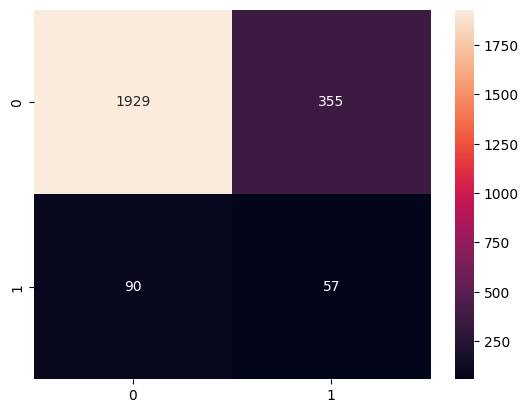

In [40]:
sns.heatmap(cm, annot=True, fmt='.4g')

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, roc_auc_score, RocCurveDisplay
round(accuracy_score(y_test, y_pred), 2)

0.82

In [42]:
y_pred_p = model_fin.predict_proba(X_test)

In [43]:
roc_auc_score(y_test, y_pred)

0.6161630151184817

In [44]:
roc_auc_score(y_test, model_fin.decision_function(X_test), average=None)

0.693630341803972

In [45]:
precision = precision_score(y_test, y_pred)
precision

0.1383495145631068

In [46]:
f1 = f1_score(y_test, y_pred)
f1

0.20393559928443647

In [47]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [48]:
roc_auc = auc(fpr, tpr)
roc_auc

0.6161630151184817

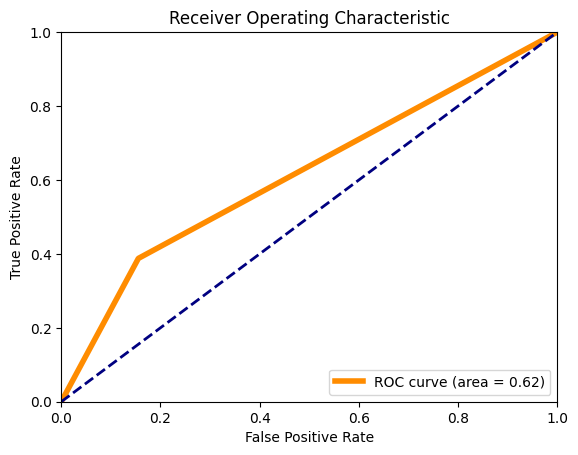

In [49]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=4,  label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()